In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


## load the model 
`readNet()` function reads the neural network and accepts (mostly) two arguments:

weights = the trained weights that the neural network has

config = the model configuration file and right now it is the yolov3.cfg


In [56]:
dnn = cv.dnn.readNet("./yolov3.weights", "./yolov3.cfg" )
with open("coco.names") as fp:
    classes = [line.strip() for line in fp.readlines()]

layers_names = dnn.getLayerNames()

output_layers = [layers_names[int(i)-1] for i in dnn.getUnconnectedOutLayers()]
print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


In [57]:
dnn.getUnconnectedOutLayers()


array([200, 227, 254])

## The image must be read and preprocessed for input

use ``imread()`` of OpenCV. 

use ``dnn.blobFromImage()`` to prepare the image in a correct form to be fed into the model.
``blobFromImage()`` creates 4-dimensional blob from image. It can also resize, crop image from center, subtract mean values, scale values by scalefactor, swap Blue and Red channels. 

scalefactor: scales the image by the provided value. It has a default value of 1 (no scaling).

size: resizing the image. (x,y) is to be given.

mean: the values that are subtracted from the image's RGB color channels. Makes the final input invariance to different illumination scales.





In [58]:
image = cv.imread(".\\nirmalBadri.jpg")
image = cv.resize(image, None, fx=0.4, fy=0.4)
height, width, channels = image.shape
blob = cv.dnn.blobFromImage(image=image, scalefactor=0.00392,size=(320, 320), mean=(0,0,0), swapRB=True, crop=False)


## Forward Propagate the Input Through the Model

we have to pass the blob that we made above to the model and forward pass it through the model



In [59]:
#set the input blob for the neural network 
dnn.setInput(blob)

#forward pass image blog through the model
outputs = dnn.forward(output_layers)

The outputs is an array which consists of prediction from three output layers. 

Each output layers consists of:


In [60]:
for output in outputs:
   
    for detect in output:
        scores=detect[5:]
        
        
        class_id = np.argmax(scores)
        conf = scores[class_id]
        if (conf > 0.3):
            print(class_id, conf, len(scores))

0 0.99398124 80
0 0.78217554 80
0 0.9989481 80
56 0.9152243 80
0 0.9984633 80
0 0.810227 80
0 0.9910188 80
56 0.4808786 80
56 0.6228935 80
56 0.48170298 80
56 0.95190537 80
56 0.7926438 80
56 0.4209642 80
56 0.78683573 80
56 0.9181627 80
0 0.92831326 80
0 0.5210632 80
56 0.5289142 80
56 0.5402962 80
63 0.53151155 80
63 0.7130758 80
63 0.7029967 80
63 0.31758213 80
63 0.49467131 80
0 0.5135233 80
0 0.69229686 80
66 0.38787445 80


In [61]:
boxes = []
confs = []
class_ids = []
for output in outputs:
    for detect in output:
        scores = detect[5:]
        # print(scores)
        class_id = np.argmax(scores)
        conf = scores[class_id]
        if conf > 0.3:
            center_x = int(detect[0]*width)
            # print(center_x)
            
            center_y = int(detect[1] * height)
            w = int(detect[2] * width)
            h = int(detect[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confs.append(float(conf))
            class_ids.append(class_id)

In [62]:
print(boxes, confs, class_ids)

[[27, 300, 736, 785], [705, 334, 777, 733], [795, 307, 775, 790], [7, 437, 524, 742], [31, 321, 729, 867], [691, 327, 793, 828], [821, 326, 742, 839], [1082, 559, 508, 494], [1068, 472, 525, 673], [24, 638, 500, 522], [19, 565, 505, 631], [43, 570, 616, 629], [944, 600, 628, 570], [1071, 637, 499, 504], [1047, 558, 545, 620], [227, 266, 161, 154], [240, 261, 167, 155], [515, 402, 223, 228], [506, 396, 237, 217], [523, 402, 212, 307], [501, 407, 250, 310], [516, 412, 265, 311], [753, 448, 324, 247], [785, 569, 242, 126], [233, 259, 151, 136], [227, 265, 160, 140], [806, 585, 184, 113]] [0.9939812421798706, 0.7821755409240723, 0.9989480972290039, 0.9152243137359619, 0.9984632730484009, 0.8102269768714905, 0.9910187721252441, 0.4808785915374756, 0.6228935122489929, 0.481702983379364, 0.951905369758606, 0.7926437854766846, 0.42096421122550964, 0.7868357300758362, 0.9181627035140991, 0.9283132553100586, 0.5210632085800171, 0.528914213180542, 0.540296196937561, 0.5315115451812744, 0.71307581

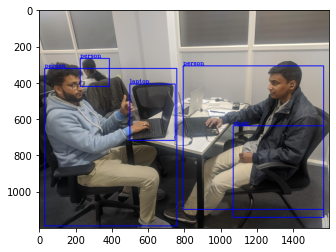

In [63]:
indices = cv.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
font = cv.FONT_HERSHEY_COMPLEX
# img = cv.imread("./nirmalBadri.jpeg")
for i in range(len(boxes)):
    if i in indices:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        cv.rectangle(image, (x,y), (x+w, y+h), 255, 3)
        cv.putText(image, label, (x, y-5), font, 1, 255, 2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))